# Channel Data

In this notebook, we will explore the access to channel data and explore it.

We first import the required modules of the library and adjust the parameters.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.insert(0, '../src')

import numpy as np

from deepverse import ParameterManager
from deepverse import Dataset

from pprint import pprint

# Path to the MATLAB configuration file
config_path = os.path.join("../params/config.m")

# Initialize ParameterManager and load parameters
param_manager = ParameterManager(config_path)

param_manager.params['dataset_folder'] = r'D:\DeepVerse\scenarios'
param_manager.params['scenario'] = 'Town01-Carla'

# # Print the parameters
print("Loaded Parameters:")
pprint(param_manager.params)

Loaded Parameters:
{'basestations': [1],
 'camera': True,
 'camera_id': [1, 2, 3, 4, 5],
 'comm': {'OFDM': {'bandwidth': 0.05,
                   'selected_subcarriers': [0, 1],
                   'subcarriers': 512},
          'activate_RX_filter': 0,
          'bs_antenna': {'FoV': [360, 180],
                         'rotation': [5, 10, 20],
                         'shape': [32, 1],
                         'spacing': 0.5},
          'enable': True,
          'enable_Doppler': 1,
          'generate_OFDM_channels': 1,
          'num_paths': 25,
          'ue_antenna': {'FoV': [360, 180],
                         'rotation': [0, 30, 0],
                         'shape': [1, 1],
                         'spacing': 0.5}},
 'dataset_folder': 'D:\\DeepVerse\\scenarios',
 'lidar': True,
 'position': True,
 'radar': {'FMCW': {'Fs': 4000000.0,
                    'chirp_slope': 15000000000000.0,
                    'n_chirps': 256,
                    'n_samples_per_chirp': 512},
         

As it can be seen from the printed parameters, there are 3 main relevant parameters to the communication channels, with many subparameters. Specifically, 
- *`basestation` parameter*: Enables if the lidar data will be included in the dataset. It is required to be `True` to be able to access to the lidar data. 
- *`scenes` parameter*: Determines which scenes to be included in the dataset. In this example, it is set to the samples $100$ and $101$. Thus, we will have only two samples available.
- *`comm` parameter*: Includes a dictionary of sub-parameters, which adjusts the wireless channel properties:
    - *`enable`*: Enable communication data generation. If `False`, no channel data will be generated.
    - *`OFDM`*:
        - *`bandwidth`*: Bandwidth of the OFDM signal in GHz. If there are `512` subcarriers with `240` KHz spacing, it should be set to `240*512/10^6` =  0.12288
        - *`subcarriers`*: # of subcarriers. E.g., `512`
        - *`selected_subcarriers`*: Subset of subcarriers to be generated. For example, `[0, 1]` only generates the first 2 subcarriers.
    - *`bs_antenna`* and *`ue_antenna`*: Parameters of the antenna geometry and response for basestation and users, respectively.
        - *`shape`*: 2D array of shape in the format of [horizontal, vertical]. For 8x4 panel, it should be set to [8, 4]. For a ULA with 8 elements, it should be set to [8, 1].
        - *`rotation`*: The rotation applied to the antenna in the format compliant with 3GPP 38.901 rotation, i.e., $[\alpha,\ \beta,\ \gamma]$
        - *`spacing`*: 2D array of spacing in the format of [horizontal_spacing, vertical_spacing]. Each horizontal or vertical element will be spaced as horizontal_spacing * $\lambda$ or vertical_spacing * $\lambda$. If $\lambda/2$ spacing is desired, it should be set to [1/2, 1/2].
        - *`FoV`*: Field of view applied to the paths from the looking direction of the antenna. It is also in the format of [horizontal, vertical] with maximum values [360, 180] for full coverage. With [180, 180] applied, the paths only from/towards the half plane in the look direction of the antenna are used in the channel generation.
    - *`num_paths`*: Maximum number of paths to be utilized in the channel generation. If it is set to $5$, only the $5$ paths with the most power will be included in the channel. This parameter can decrease the channel complexity by ignoring the paths with lower powers. 
    - *`enable_doppler`*: If Doppler effect is to be added to the channels. With `False`, static channels without Doppler effect are generated.
    - *`activate_RX_filter`*: To be detailed later, preferred to be `False` or $0$ for now with python version.
    - *`generate_OFDM_channels`*: To be detailed later, preferred to be `True` or $1$ for now with python version.

Let us now generate the dataset:

In [2]:
dataset = Dataset(param_manager)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.

Scene 1/2

Basestation 1


Generating channels: 100%|██████████| 1/1 [00:04<00:00,  4.69s/it]



Scene 2/2

Basestation 1


Generating channels: 100%|██████████| 1/1 [00:04<00:00,  4.79s/it]



Scene 1/2

Basestation 1

UE-BS Channels


Generating channels: 100%|██████████| 2/2 [00:00<00:00, 999.24it/s]



BS-BS Channels


Generating channels: 100%|██████████| 1/1 [00:00<00:00, 250.11it/s]



Scene 2/2

Basestation 1

UE-BS Channels


Generating channels: 100%|██████████| 2/2 [00:00<00:00, 2002.53it/s]



BS-BS Channels


Generating channels: 100%|██████████| 1/1 [00:00<00:00, 333.57it/s]


### Accessing Channel Data

Let us now explore the available channel information. Since we have only activated the first basestation with the parameter `basestation`, we can access to the channels of the first basestation. We can obtain the channel object between user 2 and the basestation at the first available scene `100` by

In [7]:
comm_sample = dataset.get_sample('comm-ue', index=0, bs_idx=0, ue_idx=1)

We can print the details of the channel object easily with the print command.

In [13]:
print(comm_sample)

Channel Information:
-------------------
Transmitting Antenna: Antenna - Size: [32, 1] Rot: [ 5 10 20] FoV: [360, 180] Spacing: 0.5
Receiving Antenna: Antenna - Size: [1, 1] Rot: [ 0 30  0] FoV: [360, 180] Spacing: 0.5
Carrier Frequency: 28000000000.0 Hz
Bandwidth: 50000000.0 Hz
Paths: Paths:
DoD_theta: [1.3811515  1.38362173 1.40949038 1.41191557 1.3202163  1.8206727
 1.65926564 1.47092104 1.63299673 1.30459133 1.34929941 1.5766791
 1.3610427  1.46128725 2.00179369 2.14275325 1.35640059 1.68500258
 1.39967586 1.57031015 1.3743585  1.37616023 1.3661983  1.41808994
 2.72399491 1.4386514  1.39639683 1.35646145 1.37412369 1.42947368
 1.35202465 1.32111559 1.3998884  1.32675375 1.37458204 1.40316979
 1.40689579 1.5076643  1.50153664 1.37460524 1.3497962  1.40776305
 1.37279858 1.40509155 1.40625602 1.40713337 1.39652374 1.41793645
 1.39557523 1.35568242 1.48647306 1.40441265 1.37167283 1.34827895
 1.41492638 1.57429244 1.39757969 1.35251128 1.39938953 1.4166564
 1.41107088 1.42948028 1.589

The channel coefficients can be accessed with `comm_sample.coeffs` which has the shape

In [14]:
comm_sample.coeffs.shape

(32, 1, 2)

where the shape is (# of bs antennas x # of ue antennas x # of subcarriers).

The paths of the channel can be accessed with

In [18]:
print(comm_sample.paths)

Paths:
DoD_theta: [1.3811515  1.38362173 1.40949038 1.41191557 1.3202163  1.8206727
 1.65926564 1.47092104 1.63299673 1.30459133 1.34929941 1.5766791
 1.3610427  1.46128725 2.00179369 2.14275325 1.35640059 1.68500258
 1.39967586 1.57031015 1.3743585  1.37616023 1.3661983  1.41808994
 2.72399491 1.4386514  1.39639683 1.35646145 1.37412369 1.42947368
 1.35202465 1.32111559 1.3998884  1.32675375 1.37458204 1.40316979
 1.40689579 1.5076643  1.50153664 1.37460524 1.3497962  1.40776305
 1.37279858 1.40509155 1.40625602 1.40713337 1.39652374 1.41793645
 1.39557523 1.35568242 1.48647306 1.40441265 1.37167283 1.34827895
 1.41492638 1.57429244 1.39757969 1.35251128 1.39938953 1.4166564
 1.41107088 1.42948028 1.58950578 1.40959728 1.46042024 1.48528182
 1.4091817  1.36825956 1.39988197 1.61028414 1.43270519 1.48732946
 1.42834964 1.80034925 1.51617691 1.37226886 1.38128589 1.33965071
 1.40645286 1.59478304 1.40728243 1.68855765 1.60148824 1.43713213
 1.39985539 1.80460371 1.46192187 1.67229599 1.

which has the keys `DoA_phi`, `DoA_theta`, `DoD_phi`, `DoD_theta`, `ToA`, `Power`, `Phase`, `Doppler_vel` and `Doppler_acc`. Let us print the time of arrival of the paths:

In [19]:
comm_sample.paths.ToA

array([7.53158020e-07, 7.54009989e-07, 7.53560016e-07, 7.54411985e-07,
       7.88279976e-07, 7.73064983e-07, 7.65624009e-07, 7.75990998e-07,
       8.16338002e-07, 7.54357984e-07, 7.76169998e-07, 7.86595990e-07,
       8.06334981e-07, 7.90474985e-07, 8.21226990e-07, 7.87716999e-07,
       7.78064020e-07, 8.41867006e-07, 7.65078994e-07, 8.42566976e-07,
       8.03264015e-07, 8.20135995e-07, 7.84473002e-07, 8.05473974e-07,
       7.89655019e-07, 7.54406983e-07, 7.90261993e-07, 8.17844011e-07,
       7.98684027e-07, 7.77819025e-07, 8.04784975e-07, 7.55434996e-07,
       7.75811998e-07, 7.74763976e-07, 8.77217985e-07, 7.73802014e-07,
       7.70146016e-07, 8.00939972e-07, 7.78032017e-07, 7.98411975e-07,
       8.00832993e-07, 7.53940981e-07, 7.69491010e-07, 7.76838988e-07,
       7.54911980e-07, 7.57655982e-07, 7.86251974e-07, 7.76333025e-07,
       7.92865023e-07, 8.65082995e-07, 8.30637020e-07, 7.54041992e-07,
       7.62643026e-07, 8.00577027e-07, 7.81308984e-07, 8.73814997e-07,
      

We further can print the transmitter and receiver antenna properties of this channel.

In [20]:
print(comm_sample.tx_antenna)
print(comm_sample.rx_antenna)

Antenna - Size: [32, 1] Rot: [ 5 10 20] FoV: [360, 180] Spacing: 0.5
Antenna - Size: [1, 1] Rot: [ 0 30  0] FoV: [360, 180] Spacing: 0.5


The line-of-sight status of the channel (-1: No paths, 0: NLoS, 1: LoS) can be check with

In [22]:
print(comm_sample.LoS_status)

-1


#### Visualizing the Channel

We can visualize the angle-time domain channels to check the pattern

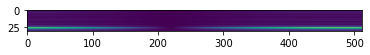

In [28]:
h = comm_sample.coeffs.squeeze()
h = np.fft.fft(h, axis=0) # FFT over transmit antennas
h = np.fft.fft(h, 512, axis=1) # FFT over subcarriers

import matplotlib.pyplot as plt
plt.imshow(np.abs(h))